#MOBILE TRAIN

In [20]:
import tensorflow
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical


In [36]:
ds = pd.read_csv('/content/drive/MyDrive/mobiletrain.csv')
X_train = ds.drop('price_range',axis=1).values
y_train= ds['price_range'].values
ds.shape
ds.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [38]:
test_dt = pd.read_csv('/content/drive/MyDrive/mobiletest.csv')
X_test = test_dt.drop('id',axis=1).values
test_dt.isnull().sum()
test_dt.shape
test_dt.head()

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     0  
1          7        1             0     0  
2         10        0             1     1  
3          7        1             1     0  
4          7        1             0     1  

[5 rows x 21 columns]

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
y_train = to_categorical(y_train)
X_test = scaler.fit_transform(X_test)

In [40]:
model = Sequential()
model.add(Dense(64,activation='relu',input_dim=X_train.shape[1]))
model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [41]:
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
63/63 [==============================] - 1s 4ms/step - loss: 1.2840 - accuracy: 0.4060
Epoch 2/10
63/63 [==============================] - 0s 5ms/step - loss: 0.8393 - accuracy: 0.6945
Epoch 3/10
63/63 [==============================] - 0s 4ms/step - loss: 0.5421 - accuracy: 0.8345
Epoch 4/10
63/63 [==============================] - 0s 3ms/step - loss: 0.3846 - accuracy: 0.8935
Epoch 5/10
63/63 [==============================] - 0s 3ms/step - loss: 0.2867 - accuracy: 0.9195
Epoch 6/10
63/63 [==============================] - 0s 4ms/step - loss: 0.2259 - accuracy: 0.9370
Epoch 7/10
63/63 [==============================] - 0s 4ms/step - loss: 0.1866 - accuracy: 0.9470
Epoch 8/10
63/63 [==============================] - 0s 4ms/step - loss: 0.1575 - accuracy: 0.9595
Epoch 9/10
63/63 [==============================] - 0s 3ms/step - loss: 0.1367 - accuracy: 0.9600
Epoch 10/10
63/63 [==============================] - 0s 3ms/step - loss: 0.1195 - accuracy: 0.9665


In [42]:
y_pred = model.predict(X_test)

32/32 [==============================] - 0s 2ms/step


#fashion_mnist

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [45]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [46]:
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [47]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [48]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [49]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5006 - accuracy: 0.8235 - val_loss: 0.4235 - val_accuracy: 0.8505
Epoch 2/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3781 - accuracy: 0.8642 - val_loss: 0.3974 - val_accuracy: 0.8574
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3389 - accuracy: 0.8755 - val_loss: 0.3615 - val_accuracy: 0.8707
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3149 - accuracy: 0.8838 - val_loss: 0.3779 - val_accuracy: 0.8656
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2975 - accuracy: 0.8900 - val_loss: 0.3523 - val_accuracy: 0.8735
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2822 - accuracy: 0.8959 - val_loss: 0.3573 - val_accuracy: 0.8754
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2687 - accuracy: 0.9006 - val_loss: 0.3380 - val_ac

In [50]:
pred = model.predict(X_test[:10])
predicted_labels = np.argmax(pred, axis=1)
print(pred)

1/1 [==============================] - 0s 92ms/step
[[2.45664733e-08 3.04847564e-10 5.79663784e-08 5.70041259e-09
  1.66041825e-09 5.63684480e-05 6.62473326e-07 5.62989600e-02
  1.64121644e-07 9.43643808e-01]
 [9.09108931e-05 7.70324516e-12 9.97533917e-01 6.50864519e-12
  1.96906412e-03 3.82459879e-13 4.06053412e-04 9.71851180e-13
  1.40276499e-10 1.63198103e-15]
 [1.95464693e-08 9.99999940e-01 9.22630136e-13 1.23830751e-10
  1.11718829e-11 1.48510177e-18 2.49875485e-11 4.88569746e-21
  1.25146587e-15 3.46789320e-19]
 [5.57495454e-08 9.99999821e-01 1.82962881e-10 7.07841394e-08
  5.41910350e-10 3.52785157e-14 1.77950454e-09 5.55505341e-19
  2.01899790e-13 1.13726763e-13]
 [2.12540776e-01 1.93212500e-07 2.64820401e-02 8.25304232e-05
  1.64926483e-03 2.62705703e-06 7.58891225e-01 2.34709304e-07
  3.51112569e-04 1.02507180e-07]
 [4.34190383e-07 9.99999464e-01 7.76838108e-11 7.71752273e-10
  4.77426543e-10 3.20796703e-15 1.32187097e-08 1.77603883e-16
  1.74115835e-13 1.08345731e-16]
 [1.98

In [51]:
rand , accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy * 100))


313/313 [==============================] - 1s 2ms/step - loss: 0.3583 - accuracy: 0.8778
Accuracy: 87.78


In [53]:
cn = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

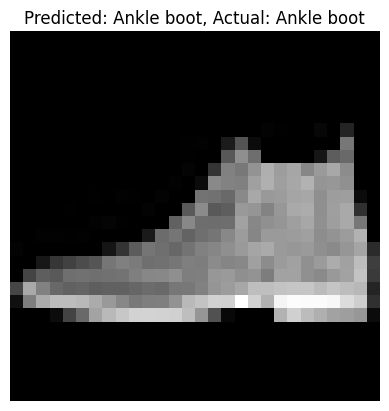

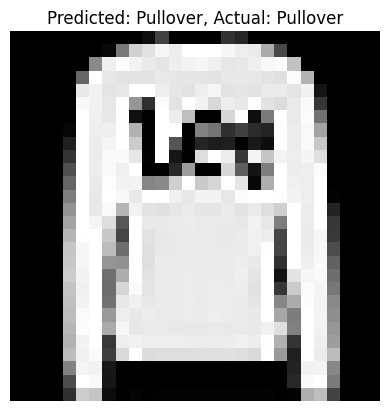

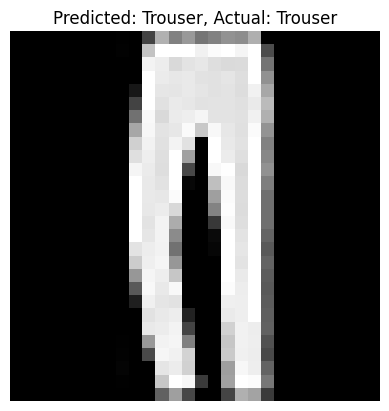

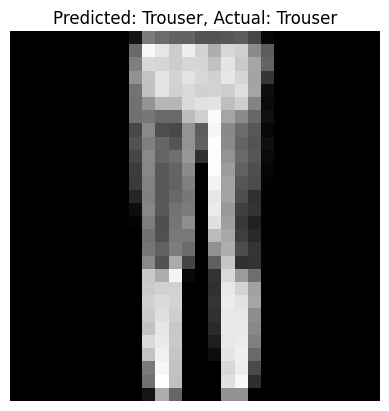

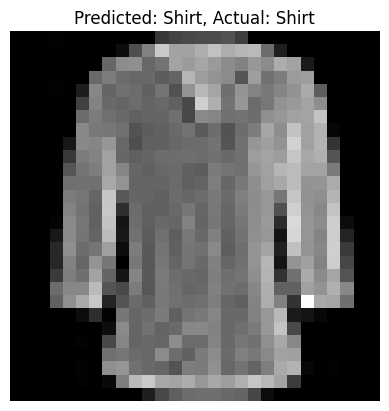

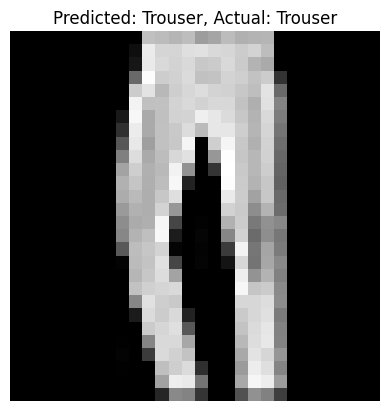

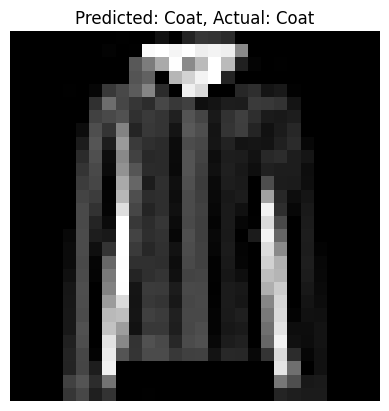

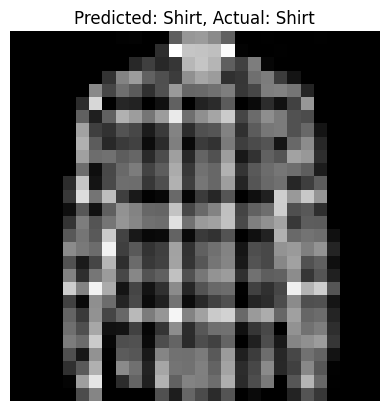

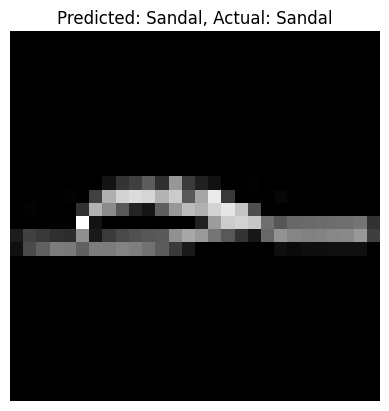

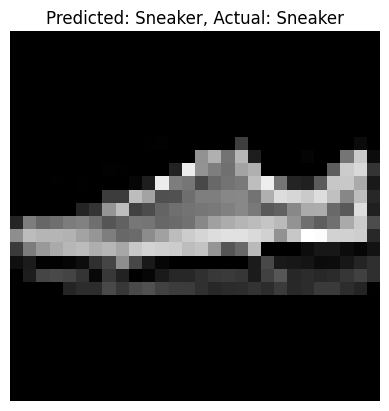

In [54]:
for i in range(10):
    plt.imshow(X_test[i], cmap='gray')
    plt.title("Predicted: {}, Actual: {}".format(cn[predicted_labels[i]], cn[np.argmax(y_test[i])]))
    plt.axis('off')
    plt.show()

#Penguin

In [55]:
try:
  import tensorflow as tf
  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt
  from sklearn.model_selection import train_test_split
  from sklearn.metrics import confusion_matrix, classification
  print('Library Loaded ...')
except:
  print('One or More Library was not Found!')

One or More Library was not Found!


In [56]:
def readTrainTestData():
  names=['rowid', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']
  path="/content/drive/MyDrive/penguin.csv"
  df = pd.read_csv(path, names=names,header=0)
  columns_norm = [ 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',  'body_mass_g', 'sex']
  X_Data = df[columns_norm]
  X_Data = X_Data.apply(lambda x:((x-x.min())/(x.max()-x.min())))
  Y_Data =df["species"]
  Y_Data = df["species"].map({
      "Adelie":0,
      "Gentoo":1,
      "Chinstrap":2
  })
  X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data,
                                                      Y_Data,
                                                      test_size=0.3,
                                                      random_state=101)
  return X_Train, X_Test, Y_Train, Y_Test

In [57]:
def create_feature_column():
  fbill_length_mm= tf.feature_column.numeric_column('bill_length_mm')
  fbill_depth_mm= tf.feature_column.numeric_column('bill_depth_mm')
  fflipper_length_mm= tf.feature_column.numeric_column('flipper_length_mm')
  fbody_mass_g= tf.feature_column.numeric_column('body_mass_g')
  fsex= tf.feature_column.numeric_column('sex')


  feat_column= [fbill_length_mm, fbill_depth_mm,  fflipper_length_mm, fbody_mass_g, fsex ]
  return feat_column

In [58]:
X_Train, X_Test, Y_Train,Y_Test= readTrainTestData()
feature_column=create_feature_column()

input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_Train,y=Y_Train,
                                                           batch_size=40,num_epochs=100,
                                                           shuffle=True)
eval_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_Test,y=Y_Test,
                                                               batch_size=40,
                                                               num_epochs=1,
                                                              shuffle=False)
predict_input_fn=tf.compat.v1.estimator.inputs.pandas_input_fn(
    x=X_Test,
    num_epochs=1,
    shuffle=False
)

TypeError: ignored

#heart

In [59]:
df = pd.read_csv('/content/drive/MyDrive/heart.csv')

In [60]:
df

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0  

[303 rows x 14 columns]

In [62]:
X = df.drop('output',axis=1)
y = df['output']

In [63]:
X = (X - X.mean()) / X.std()

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [66]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [67]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
7/7 [==============================] - 2s 96ms/step - loss: 0.6890 - accuracy: 0.6083 - val_loss: 0.6170 - val_accuracy: 0.7200
Epoch 2/50
7/7 [==============================] - 0s 15ms/step - loss: 0.5871 - accuracy: 0.7558 - val_loss: 0.5540 - val_accuracy: 0.7600
Epoch 3/50
7/7 [==============================] - 0s 36ms/step - loss: 0.5160 - accuracy: 0.8157 - val_loss: 0.5021 - val_accuracy: 0.8000
Epoch 4/50
7/7 [==============================] - 0s 13ms/step - loss: 0.4643 - accuracy: 0.8433 - val_loss: 0.4638 - val_accuracy: 0.8400
Epoch 5/50
7/7 [==============================] - 0s 12ms/step - loss: 0.4293 - accuracy: 0.8433 - val_loss: 0.4346 - val_accuracy: 0.8400
Epoch 6/50
7/7 [==============================] - 0s 11ms/step - loss: 0.4044 - accuracy: 0.8525 - val_loss: 0.4179 - val_accuracy: 0.8400
Epoch 7/50
7/7 [==============================] - 0s 12ms/step - loss: 0.3849 - accuracy: 0.8525 - val_loss: 0.4019 - val_accuracy: 0.8400
Epoch 8/50
7/7 [===========

In [68]:
tloss, tacc = model.evaluate(X_test,y_test)
print("Test Accuracy: ",tacc)

2/2 [==============================] - 0s 10ms/step - loss: 0.3354 - accuracy: 0.8689
Test Accuracy:  0.868852436542511


In [70]:
predictions = model.predict(X_test)

2/2 [==============================] - 0s 8ms/step
